**Overview**

Will be using a Naive Bayes Classifier on Yelp review data, in order to determine if feedback was 'positive' or 'negative'. This will require feature engineering in order to produce the most accurate classifier. 

In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
#Read text file in and assign own headers

yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['Review', 'Positive or Negative']

In [235]:
#Take a look at the data

yelp_raw.head(5)

,Review,Positive or Negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [236]:
yelp_raw['Review'].astype(str)

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [237]:
#First, make everything lower case

yelp_raw['Review'] = yelp_raw['Review'].apply(lambda x: str(x).lower())

In [238]:
#Extract all special characters

def GetSpecialChar(x):
    special_characters = []
    for char in x:
        if char.isalpha() == False:
            special_characters.append(char)
    return special_characters

In [239]:
#Create a column in the dataframe with the special characters from each row

yelp_raw['SpecialCharacters'] = yelp_raw['Review'].apply(lambda x : GetSpecialChar(x))

In [240]:
#Now work to get unique list

special_characters = []
for row in yelp_raw['SpecialCharacters']:
    for char in row:
        special_characters.append(char)

In [217]:
#Let's see our list

set(special_characters)

{' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?'}

In [244]:
#Remove special characters from Review column

special_characters_list = [',', '\'', '.', '/', '"', '\'', '*', '-', '&', '%', '$', '(', ')', ':', ';', '?', '!', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


for char in special_characters_list:
        yelp_raw['Review'] = yelp_raw['Review'].str.replace(char, ' ')

In [245]:
#Confirm it worked
yelp_raw['Review']

0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
5         now i am getting angry and i want my damn pho 
6                  honeslty it didn t taste that fresh  
7      the potatoes were like rubber and you could te...
8                              the fries were great too 
9                                         a great touch 
10                              service was very prompt 
11                                    would not go back 
12     the cashier had no care what so ever on what i...
13     i tried the cape cod ravoli  chicken with cran...
14     i was disgusted because i was pretty sure that...
15     i was shocked because no signs indicate cash o...
16                                   highly recommended 
17                waitress was 

In [246]:
#New column that splits reviews
yelp_raw['ReviewSplit'] = yelp_raw['Review'].apply(lambda x: str(x).split())

In [247]:
#Now get a unique count of each word in all reviews. First create 'counts' variable.

from collections import Counter
counts = yelp_raw.ReviewSplit.map(Counter).sum()

In [248]:
counts.most_common(100)

[('the', 585),
 ('and', 393),
 ('i', 357),
 ('was', 295),
 ('a', 237),
 ('to', 220),
 ('is', 171),
 ('it', 153),
 ('this', 143),
 ('of', 127),
 ('food', 126),
 ('not', 116),
 ('for', 110),
 ('in', 109),
 ('place', 106),
 ('t', 97),
 ('good', 95),
 ('we', 88),
 ('service', 85),
 ('very', 76),
 ('my', 73),
 ('with', 72),
 ('great', 70),
 ('had', 70),
 ('that', 69),
 ('be', 67),
 ('so', 66),
 ('you', 66),
 ('were', 63),
 ('are', 63),
 ('but', 62),
 ('have', 62),
 ('back', 61),
 ('they', 58),
 ('here', 57),
 ('on', 55),
 ('at', 55),
 ('like', 46),
 ('go', 44),
 ('all', 44),
 ('time', 42),
 ('s', 42),
 ('our', 41),
 ('will', 37),
 ('there', 36),
 ('as', 36),
 ('really', 36),
 ('just', 35),
 ('an', 32),
 ('their', 31),
 ('if', 30),
 ('best', 30),
 ('would', 29),
 ('ever', 28),
 ('also', 27),
 ('friendly', 27),
 ('up', 26),
 ('only', 26),
 ('never', 26),
 ('one', 26),
 ('don', 26),
 ('no', 25),
 ('your', 25),
 ('restaurant', 25),
 ('out', 25),
 ('nice', 25),
 ('been', 24),
 ('what', 24),
 ('a

In [249]:
for count in counts:
    yelp_raw[str(count)] = yelp_raw.Review.str.contains(
        ' ' + str(count) + ' ',
        case=False)

**Note:** Since one of the main assumptions of the Naive Bayes Classifier is that the variables are independent of eachother, let's look at a correlation matrix to see if this is the case.

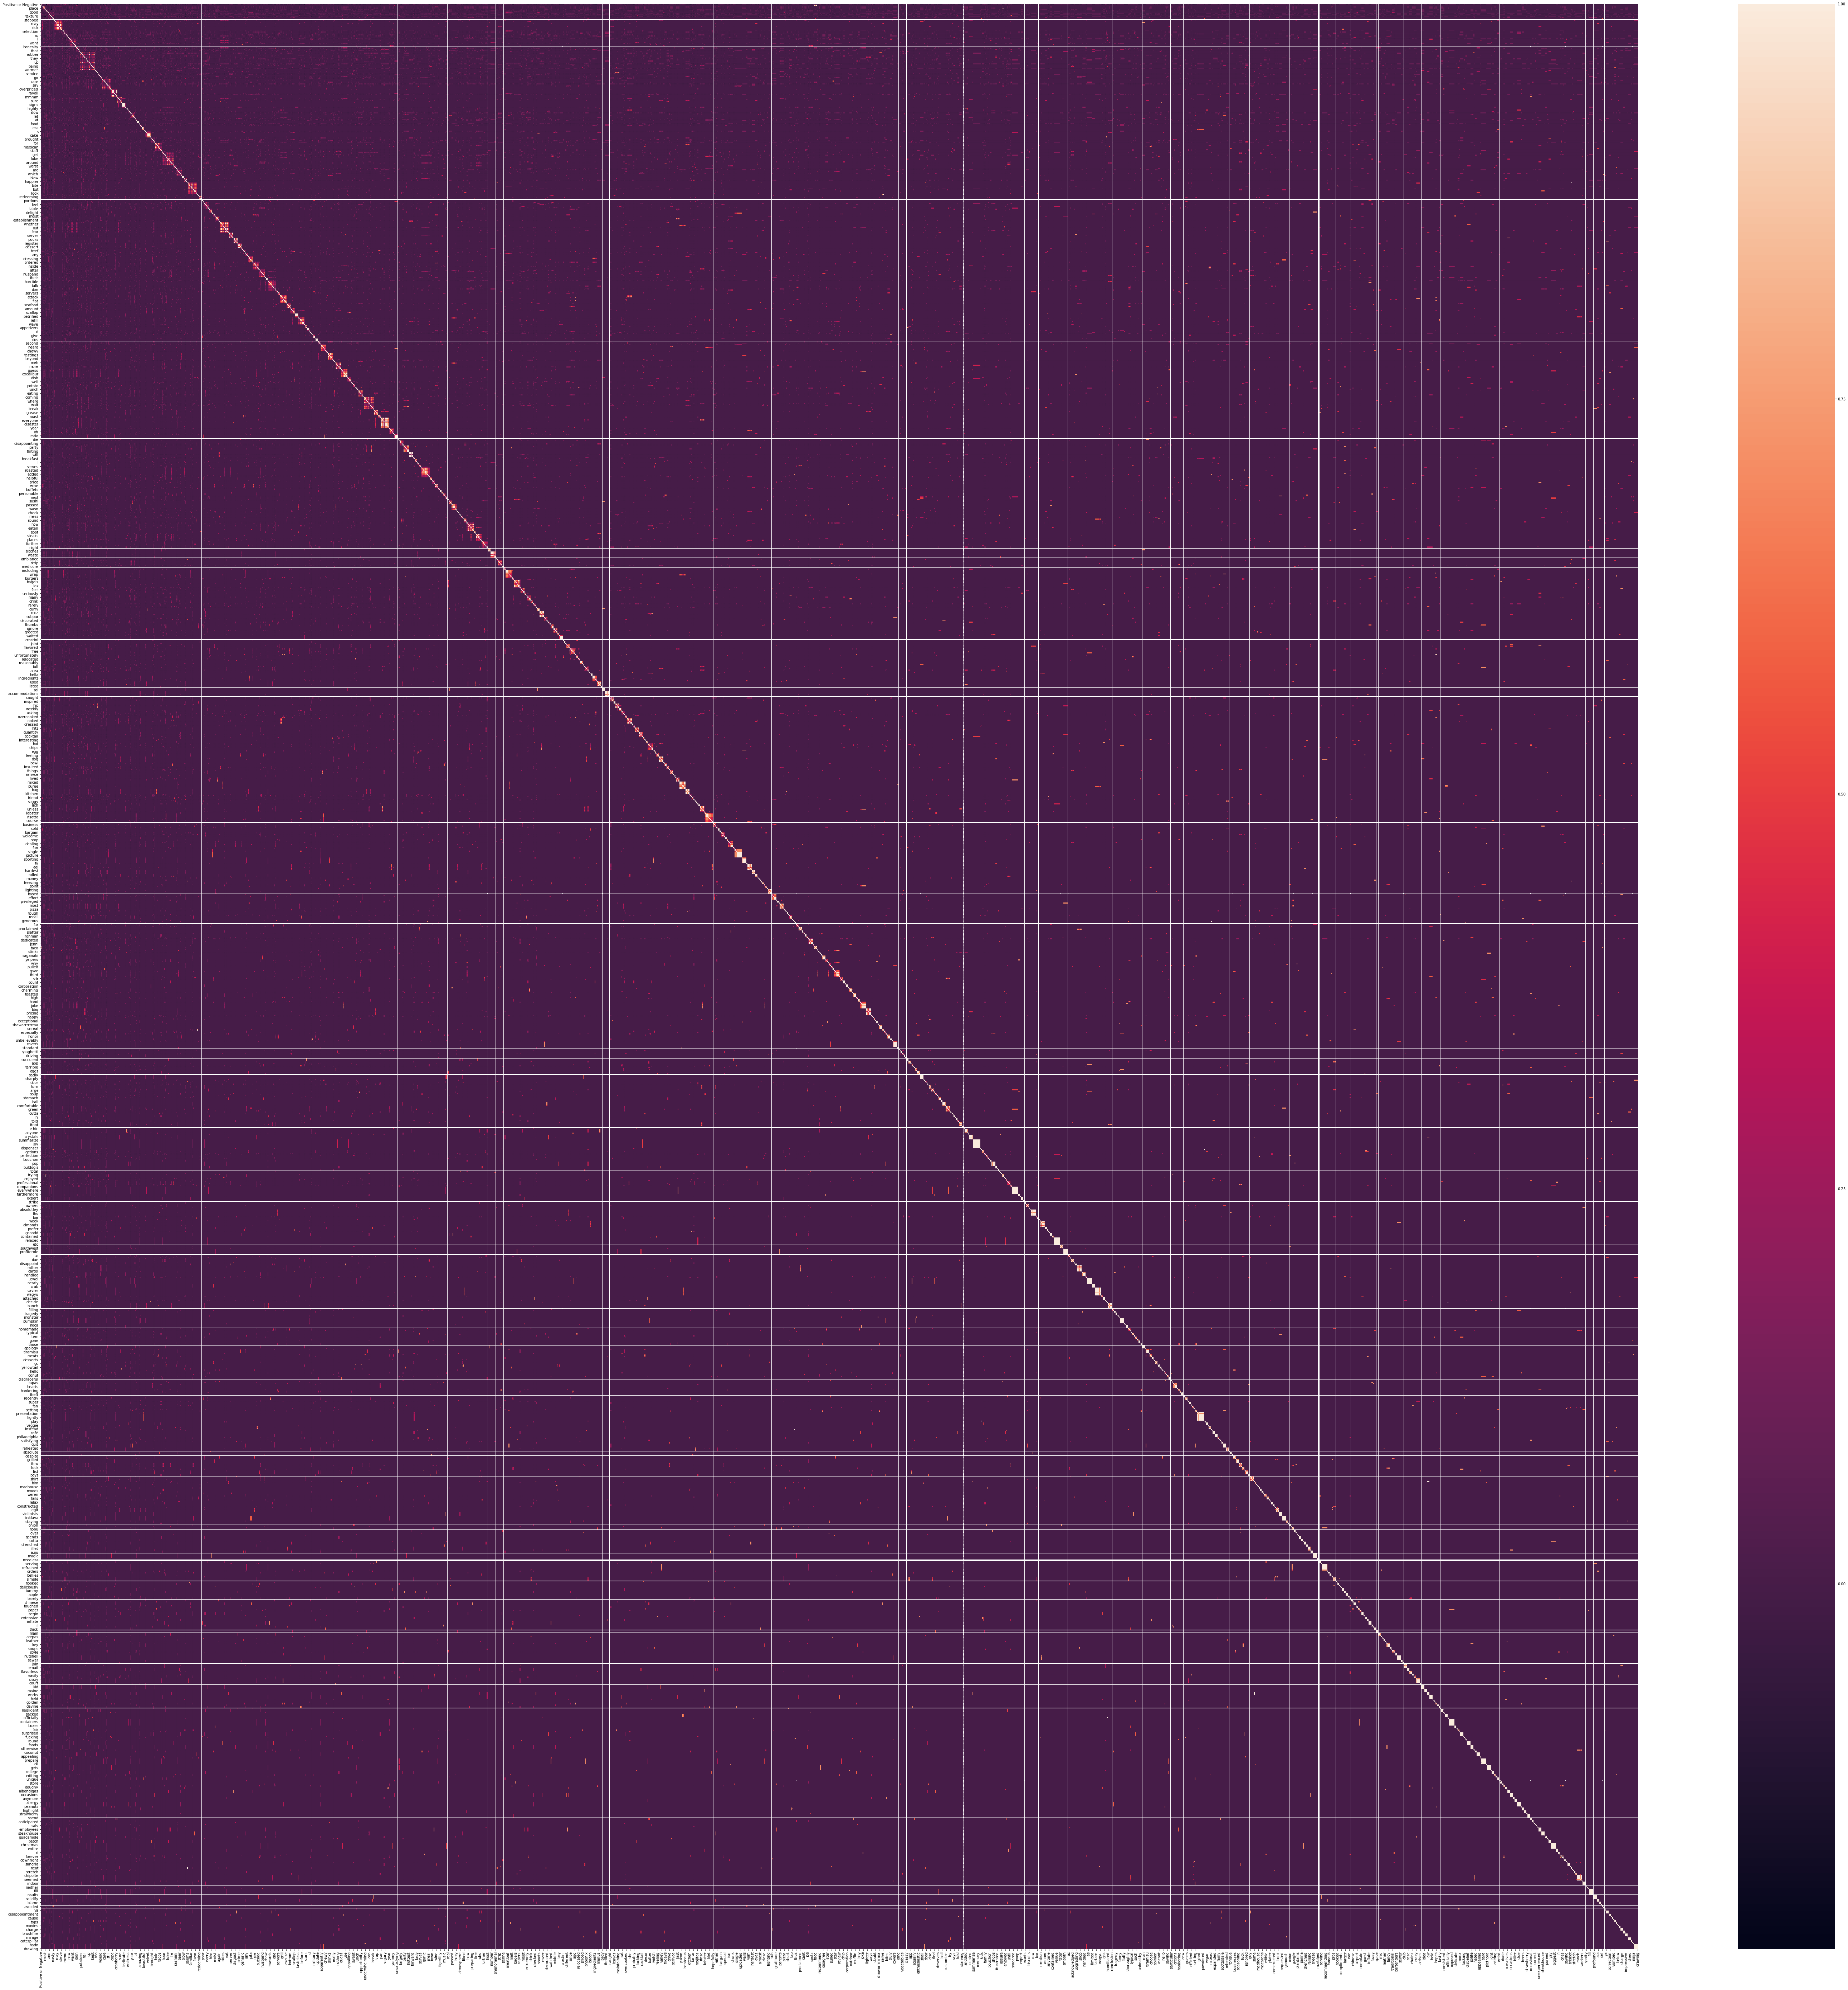

In [255]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(100, 100))

sns.heatmap(yelp_raw.corr())
plt.show()

This matrix should be good enough. Ideally, we would want no correlation whatsoever. However, although there is some correlation across the board, there is none greater than 0.25 and that should still yield strong results.

In [261]:
#Before we actually run the model we have to build out our training data. Specify an outcome (y or dependent variable) and 
#the inputs (x or independent variables). We'll do that below under the variables data and target

data = yelp_raw.iloc[:, 4:len(yelp_raw)]
target = yelp_raw['Positive or Negative']

In [271]:
#Since data is binary / boolean, need to import the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE

# Instantiate our model and store it in a new variable.
NB_Model = BernoulliNB()

# Fit our model to the data.
NB_Model.fit(data, target)

# Classify, storing the result in a new variable.
positive_predictor = NB_Model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != positive_predictor).sum()))

Number of mislabeled points out of a total 1000 points : 151


In [272]:
#Confusion matrix to better understand results

from sklearn.metrics import confusion_matrix
confusion_matrix(target, positive_predictor)

array([[409,  91],
       [ 60, 440]])

In [273]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model, data, target, cv=5)

array([0.745, 0.725, 0.635, 0.75 , 0.73 ])

Top row signifies correctly classifying positive reviews
Bottom row signifies correctly classifying negative reviews

1. Sensitivity is the percentage of positives correctly identified, in our case 409/500. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

2. Specificity is just the opposite, the percentage of negatives correctly identified, 440/500.

Type 1 Error: False Positive (false alarm) - 91
Type 2 Error: False Negative (miss) - 60

### Conducting backward pass to see how important each feature is

In [264]:
yelp_revised = yelp_raw.iloc[:, 4:len(yelp_raw.columns)]

In [265]:
for i in range(len(yelp_revised.columns)):
    #Create two slices and combine them
    first_slice = pd.DataFrame(yelp_revised.iloc[:, 0:i])
    second_slice = pd.DataFrame(yelp_revised.iloc[:, (i+1):len(yelp_revised.columns)])
    subset = pd.concat([first_slice, second_slice], axis=1)
    
    #Train model
    NB_Model = BernoulliNB()
    NB_Model.fit(subset, target)
    positive_predictor = NB_Model.predict(subset)
    
    #Print results for each column
    colnames = yelp_revised.columns[i]
    print("Number of mislabeled points out of a total {} points when dropping {} : {}".format(subset.shape[0], colnames, (target != positive_predictor).sum()))
    print("Accuracy {}".format(100 - ((target != positive_predictor).sum()/subset.shape[0]) * 100)) #I added this so you can view the accuracy as a percentage

Number of mislabeled points out of a total 1000 points when dropping wow : 89
Accuracy 91.1
Number of mislabeled points out of a total 1000 points when dropping loved : 88
Accuracy 91.2
Number of mislabeled points out of a total 1000 points when dropping this : 88
Accuracy 91.2
Number of mislabeled points out of a total 1000 points when dropping place : 89
Accuracy 91.1
Number of mislabeled points out of a total 1000 points when dropping crust : 88
Accuracy 91.2
Number of mislabeled points out of a total 1000 points when dropping is : 90
Accuracy 91.0
Number of mislabeled points out of a total 1000 points when dropping not : 93
Accuracy 90.7
Number of mislabeled points out of a total 1000 points when dropping good : 85
Accuracy 91.5
Number of mislabeled points out of a total 1000 points when dropping tasty : 87
Accuracy 91.3
Number of mislabeled points out of a total 1000 points when dropping and : 89
Accuracy 91.1
Number of mislabeled points out of a total 1000 points when dropping th

### Using Recursive Feature Selection to Rank Features

In [266]:
# Pass any estimator to the RFE constructor
selector = RFE(NB_Model)
selector = selector.fit(data, target)

In [267]:
print(selector.ranking_)

[107 425 485 491   1 495 455 493 407 499 498   1 497 453   1   1 429 224
   1 223   1   1 118   1   1 234 486 386 473 440 487 476 478 408 307 492
 108   1   1 397 471   1 230   1 324 460 366 466 431 120 449   1 474 418
 227 457 479 414 438 415   1 488 464   1   1   1 496   1 319 322 111 481
 484   1 369 456 469   1   1 153 411 426 494 403 361   1   1   1 349   1
   1   1 401 482   1 172   1 294 412 142   1   1   1   1   1   1 423 165
 167 245 357   1 490 341 420   1   1 451 395 446 461   1   1 489 468 454
   1   1   1 276   1 467 372   1   1   1   1 211 285   1 382 459   1 483
   1 130 421 133   1 239 472 444   1 445   1 417 452   1 448   1 231   1
   1 202 371   1   1   1 272   1 399 480   1 331 398 424   1 301   1   1
 225   1 470   1   1 302   1   1 402   1   1 462 112   1   1   1   1   1
 277   1 373 173   1 289   1 178 394 327   1 389 405 308 443 306   1 183
   1 182 377 261 345   1   1   1 406   1   1   1   1 141   1 430   1   1
 387   1   1   1   1 416 374   1   1   1   1 207   

In [269]:
#Now turn into a dataframe so you can sort by rank
rankings = pd.DataFrame({'Features': data.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking').head(50)

,Features,Ranking
995,why,1
378,milk,1
377,chocolate,1
727,hip,1
729,maintaining,1
373,milkshake,1
372,min,1
371,meh,1
370,rice,1
730,coziness,1
